# Capstone Project - Churn Dataset

## Section 1

### Analyzing data types of features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading Churn dataset into a dataframe
Churn=pd.read_csv("C:\\Users\\PC\\Downloads\\Churn_Modelling_26.csv", sep=',')
Churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.000000,0.00,1.0,101348.88,NaN,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.000000,83807.86,1.0,112542.58,NaN,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.000000,159660.80,3.0,113931.57,NaN,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.000000,0.00,2.0,93826.63,NaN,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.000000,125510.82,1.0,79084.10,NaN,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.000000,57369.61,1.0,101699.77,NaN,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.000000,0.00,1.0,42085.58,NaN,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.000000,75075.31,2.0,92888.52,NaN,Yes,No,1.0
9999,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.000000,130142.79,1.0,38190.78,NaN,Yes,No,0.0


In [3]:
#Check datatypes of each column
Churn.dtypes

RowNumber          float64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
EstimatedSalary    float64
Unnamed: 11        float64
HasCrCard           object
IsActiveMember      object
Churn              float64
dtype: object

In [4]:
#Print Churn
print(Churn.columns)
print(Churn.shape)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Unnamed: 11', 'HasCrCard', 'IsActiveMember',
       'Churn'],
      dtype='object')
(10001, 15)


In [5]:
print(Churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  float64
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           9990 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  EstimatedSalary  10000 non-null  float64
 11  Unnamed: 11      0 non-null      float64
 12  HasCrCard        10000 non-null  object 
 13  IsActiveMember   10000 non-null  object 
 14  Churn            10000 non-null  float64
dtypes: float64(10), object(5)
memory usage: 1.1+ MB
None


The data comprise 10000 rows and 15 columns. The tenure column and the unnamed column contain null entries.
In the tenure column, missing values will be filled by mean while the unnamed column will be dropped.

In [6]:
Churn = Churn.drop(10000)
Churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
9995,9996.0,15606229.0,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2.0,96270.64,NaN,Yes,No,0.0
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,101699.77,NaN,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.0,0.00,1.0,42085.58,NaN,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,92888.52,NaN,Yes,No,1.0
9999,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.0,130142.79,1.0,38190.78,NaN,Yes,No,0.0


### Converting object columns to category type

In [7]:
#Used pandas categorical function to convert object columns to category type
Churn['Geography']=pd.Categorical(Churn.Geography)
Churn['Gender']=pd.Categorical(Churn.Gender)
Churn['HasCrCard']=pd.Categorical(Churn.HasCrCard)
Churn['IsActiveMember']=pd.Categorical(Churn.IsActiveMember)
print(Churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  float64 
 1   CustomerId       10000 non-null  float64 
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  float64 
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  float64 
 7   Tenure           9989 non-null   float64 
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  float64 
 10  EstimatedSalary  10000 non-null  float64 
 11  Unnamed: 11      0 non-null      float64 
 12  HasCrCard        10000 non-null  category
 13  IsActiveMember   10000 non-null  category
 14  Churn            10000 non-null  float64 
dtypes: category(4), float64(10), object(1)
memory usage: 899.1+ KB
None


### Handling Missing Values

In [8]:
#Check for null values
Churn.isna().sum()

RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                11
Balance                0
NumOfProducts          0
EstimatedSalary        0
Unnamed: 11        10000
HasCrCard              0
IsActiveMember         0
Churn                  0
dtype: int64

In [9]:
Churn['Tenure']=Churn['Tenure'].fillna(value = Churn['Tenure'].mean())
Churn.isna().sum()

RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
EstimatedSalary        0
Unnamed: 11        10000
HasCrCard              0
IsActiveMember         0
Churn                  0
dtype: int64

In [10]:
## To drop columns with missing values
print(Churn.shape)
Churn.dropna(axis=1,inplace=True)

## To drop columns with missing values permanently
# df.dropna(inplace=True)
Churn.dropna(axis=1,inplace=True)
print(Churn.shape)
Churn

(10000, 15)
(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,101348.88,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,112542.58,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,113931.57,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,93826.63,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,79084.10,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2.0,96270.64,Yes,No,0.0
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,101699.77,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.0,0.00,1.0,42085.58,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,92888.52,Yes,No,1.0


In [11]:
Churn.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
EstimatedSalary    0
HasCrCard          0
IsActiveMember     0
Churn              0
dtype: int64

## Section 2

### Handling Duplicate Rows

In [12]:
Churn.drop_duplicates(inplace=True)
print(Churn.shape)

(10000, 14)


### Checking for outliers

In [13]:
Churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Churn
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012814,76485.889288,1.530200,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


#### Age

<Axes: ylabel='Age'>

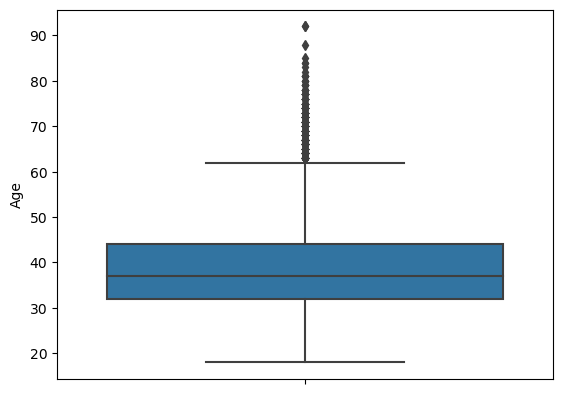

In [14]:
sns.boxplot(y='Age', data= Churn )

In [15]:
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [16]:
outliers_age = find_outliers(Churn['Age'])
print("Number of outliers:" + str(len(outliers_age)))

Number of outliers:359


#### CreditScore

<Axes: ylabel='CreditScore'>

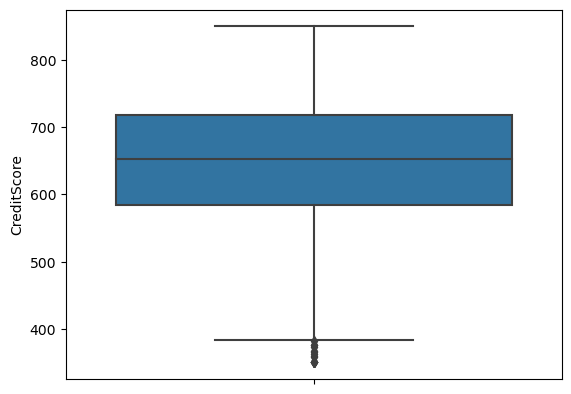

In [17]:
sns.boxplot(y='CreditScore', data= Churn )

In [18]:
outliers_cs = find_outliers(Churn['CreditScore'])
print("Number of outliers:" + str(len(outliers_cs)))

Number of outliers:15


#### Number of products

<Axes: ylabel='NumOfProducts'>

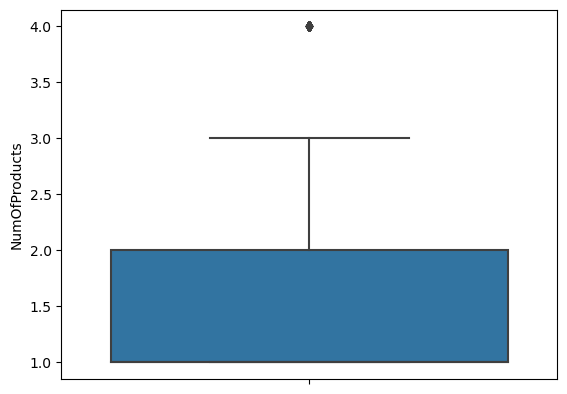

In [19]:
sns.boxplot(y='NumOfProducts', data= Churn )

In [20]:
outliers_nop = find_outliers(Churn['NumOfProducts'])
print("Number of outliers:" + str(len(outliers_nop)))

Number of outliers:60


#### Tenure

In [21]:
outliers_ten = find_outliers(Churn['Tenure'])
print("Number of outliers:" + str(len(outliers_ten)))

Number of outliers:0


#### Balance

In [22]:
outliers_bal = find_outliers(Churn['Balance'])
print("Number of outliers:" + str(len(outliers_bal)))

Number of outliers:0


#### EstimatedSalary

In [23]:
outliers_es = find_outliers(Churn['EstimatedSalary'])
print("Number of outliers:" + str(len(outliers_es)))

Number of outliers:0


### Removing outliers

#### Age

In [24]:
upper_age_limit = Churn['Age'].mean() + 3*Churn['Age'].std()
lower_age_limit = Churn['Age'].mean() - 3*Churn['Age'].std()

Churn['Age'] = np.where(Churn['Age']>upper_age_limit, upper_age_limit, np.where(Churn['Age']<lower_age_limit, lower_age_limit, Churn['Age']))

Churn.describe()[['Age']]

,Age
count,10000.000000
mean,38.862823
std,10.285849
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,70.385219


#### CreditScore

In [25]:
upper_cs_limit = Churn['CreditScore'].mean() + 3*Churn['CreditScore'].std()
lower_cs_limit = Churn['CreditScore'].mean() - 3*Churn['CreditScore'].std()

Churn['CreditScore'] = np.where(Churn['CreditScore']>upper_cs_limit, upper_cs_limit, np.where(Churn['CreditScore']<lower_cs_limit, lower_cs_limit, Churn['CreditScore']))

Churn.describe()[['CreditScore']]

,CreditScore
count,10000.000000
mean,650.535455
std,96.632988
min,360.568904
25%,584.000000
50%,652.000000
75%,718.000000
max,850.000000


#### Number of products

In [26]:
upper_nop_limit = Churn['NumOfProducts'].mean() + 3*Churn['NumOfProducts'].std()
lower_nop_limit = Churn['NumOfProducts'].mean() - 3*Churn['NumOfProducts'].std()

Churn['NumOfProducts'] = np.where(Churn['NumOfProducts']>upper_nop_limit, upper_nop_limit, np.where(Churn['NumOfProducts']<lower_nop_limit, lower_nop_limit, Churn['NumOfProducts']))

Churn.describe()[['NumOfProducts']]

,NumOfProducts
count,10000.000000
mean,1.525851
std,0.565660
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.275163


### Plotting countplots for categorical features

#### Geography

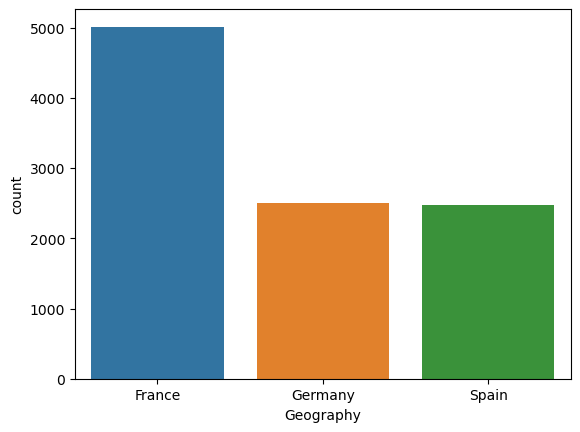

In [27]:
# count plot on single categorical variable
sns.countplot(x ='Geography', data = Churn)
 
# Show the plot
plt.show()

More customer data was collected from France as Compared to Germany and Spain. Customer Data collected for Germany and Spain were almost equal

#### Gender

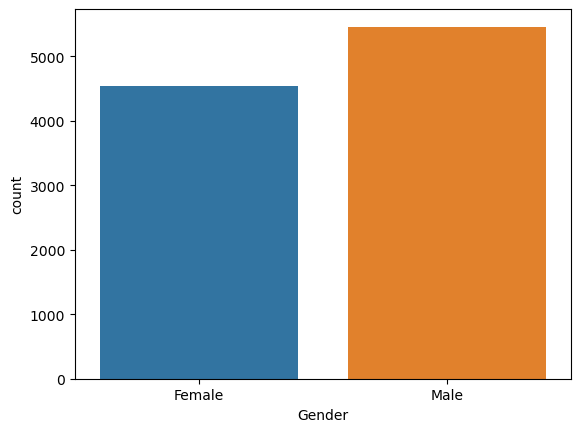

In [28]:
# count plot on single categorical variable
sns.countplot(x ='Gender', data = Churn)
 
# Show the plot
plt.show()

From of the dataset, a larger percentage was of the male gender.

#### Has Credit Card

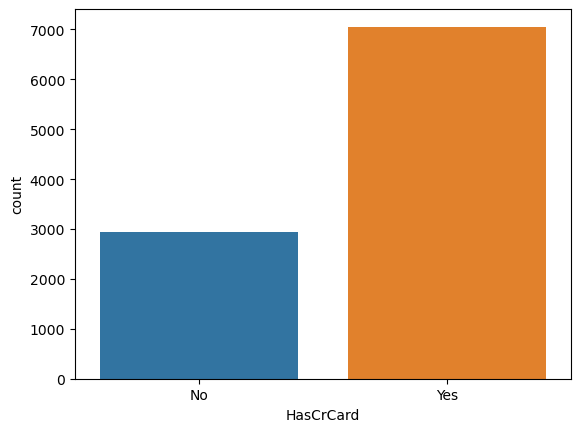

In [29]:
# count plot on single categorical variable
sns.countplot(x ='HasCrCard', data = Churn)
 
# Show the plot
plt.show()

More customers had Credit card

#### IsActiveMember

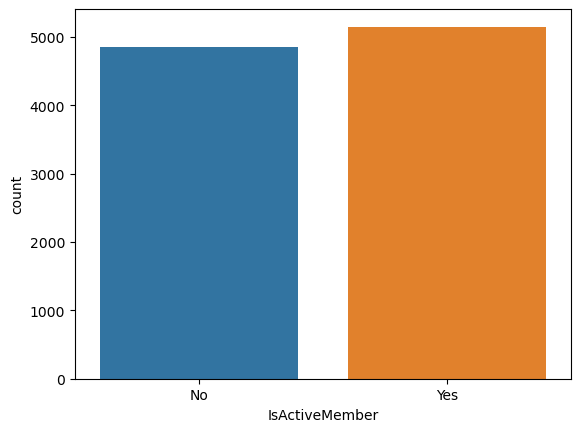

In [30]:
# count plot on single categorical variable
sns.countplot(x ='IsActiveMember', data = Churn)
 
# Show the plot
plt.show()

The difference between active and inactive members is very small, active members are slightly higher than the inactive members

### Plotting Histograms for Numerical Features and calculating skewness

#### CreditScore

-0.0699332743736497


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


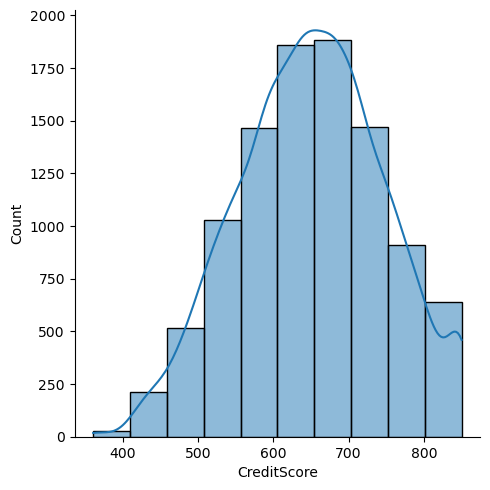

In [31]:
sns.displot(Churn['CreditScore'], bins =10, kde=True)

print(Churn['CreditScore'].skew())

The data is more or less symmetrical

#### Age

0.8814067684991441


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


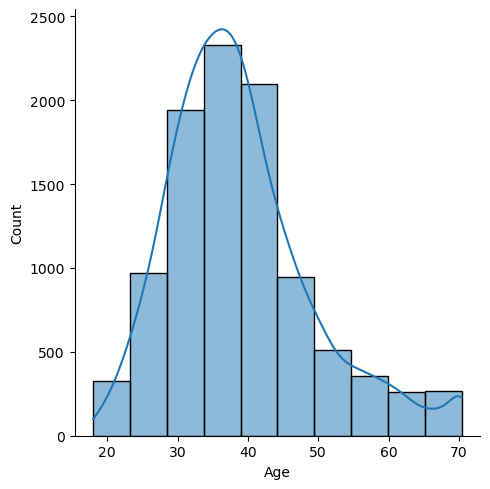

In [32]:
sns.displot(Churn['Age'], bins =10, kde=True)

print(Churn['Age'].skew())

The data is positively skewed, we will apply a transformation function to the column.

In [33]:
Churn['Age'] = np.log1p(Churn['Age'])

print(Churn['Age'].skew())

0.15063195690670117


#### Tenure

0.010976834491658425


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


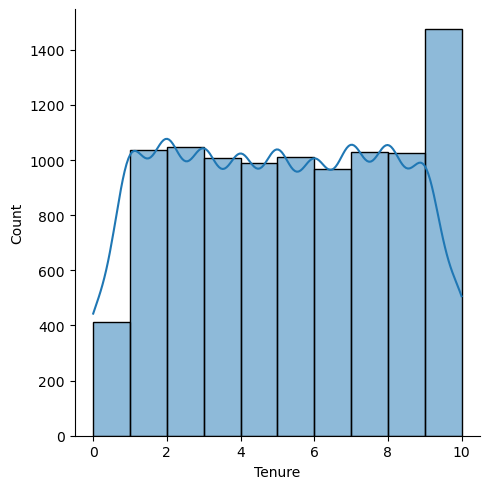

In [34]:
sns.displot(Churn['Tenure'], bins =10, kde=True)

print(Churn['Tenure'].skew())

The data is more or less symmetrical

#### Balance

-0.14110871094154384


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


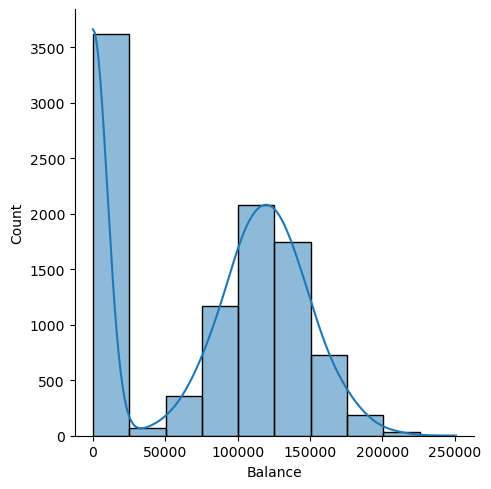

In [35]:
sns.displot(Churn['Balance'], bins =10, kde=True)

print(Churn['Balance'].skew())

The data is more or less symmetrical

#### Number of Products

0.5103002428941873


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


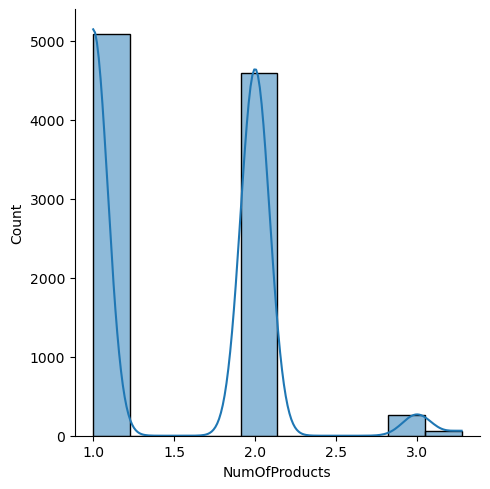

In [36]:
sns.displot(Churn['NumOfProducts'], bins =10, kde=True)

print(Churn['NumOfProducts'].skew())

The data is positively skewed, we will apply a transformation function to the column.

In [37]:
Churn['NumOfProducts'] = np.log1p(Churn['NumOfProducts'])

print(Churn['NumOfProducts'].skew())

0.2707500854169661


#### EstimatedSalary

0.0020853576615585162


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


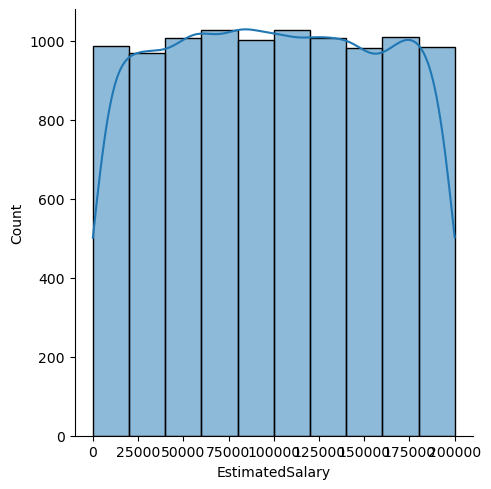

In [38]:
sns.displot(Churn['EstimatedSalary'], bins =10, kde=True)

print(Churn['EstimatedSalary'].skew())

The data is more or less symmetrical

## Section 3

### Jointplots

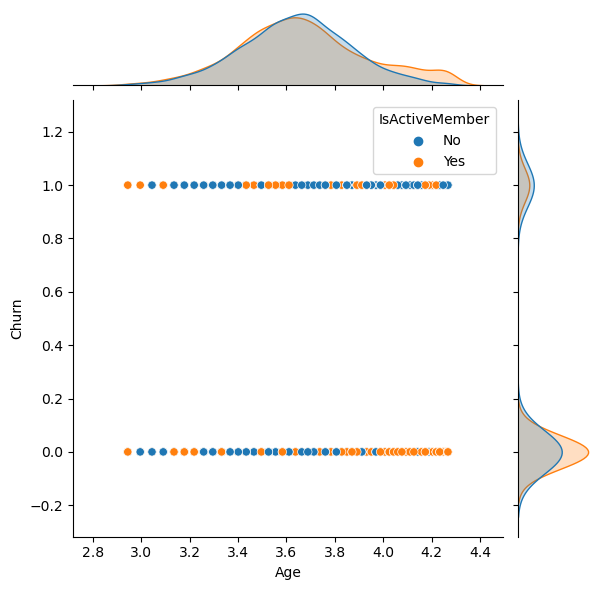

In [39]:
sns.jointplot(x= 'Age' , y= 'Churn' , data = Churn, hue = 'IsActiveMember') 

More active member did not churn as they advances in age

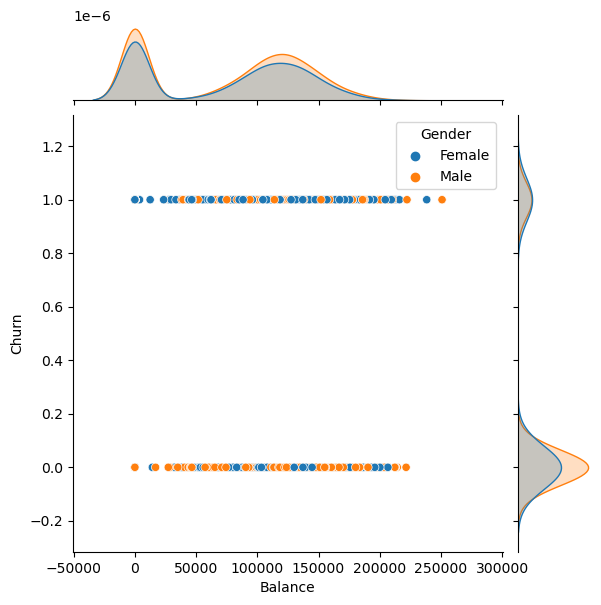

In [40]:
sns.jointplot(x= 'Balance' , y= 'Churn' , data = Churn, hue = 'Gender') 

Rate of not churning is evenly distrubited based on account balance, however more male did not churn compared to female customers

### Scatterplots

<Axes: xlabel='Age', ylabel='Churn'>

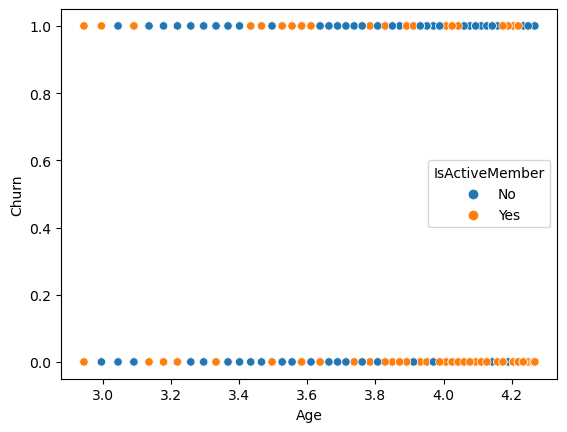

In [41]:
sns.scatterplot(x= 'Age' , y= 'Churn' , data = Churn, hue = 'IsActiveMember') 

<Axes: xlabel='Balance', ylabel='Churn'>

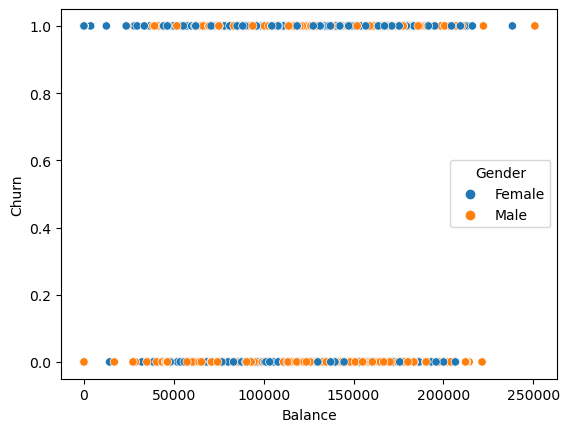

In [42]:
sns.scatterplot(x= 'Balance' , y= 'Churn' , data = Churn, hue = 'Gender') 

#### How are scatterplots and jointplots different from each other?

- **scatterplots** show individual data points as markers on a 2D plane while **jointplots** combine scatterplots with histograms providing a more comprehensive view of data.
- **scatterplots** are primarily used to visualize the relationship and correlation between variables while **jointplots** provide insights not only into the relationship between variables but also into their individual distributions.

### Scaling Numerical Features

In [43]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

Churn[numerical_columns] = scaler.fit_transform(Churn[numerical_columns])

### Processing Non-numeric features

In [44]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Churn']

label_encoder = LabelEncoder()

for col in categorical_columns:
    Churn[col] = label_encoder.fit_transform(Churn[col])

In [45]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  float64
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  int32  
 5   Gender           10000 non-null  int32  
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  EstimatedSalary  10000 non-null  float64
 11  HasCrCard        10000 non-null  int32  
 12  IsActiveMember   10000 non-null  int32  
 13  Churn            10000 non-null  int64  
dtypes: float64(8), int32(4), int64(1), object(1)
memory usage: 937.6+ KB


## Section 4

### Matrix of Correlation

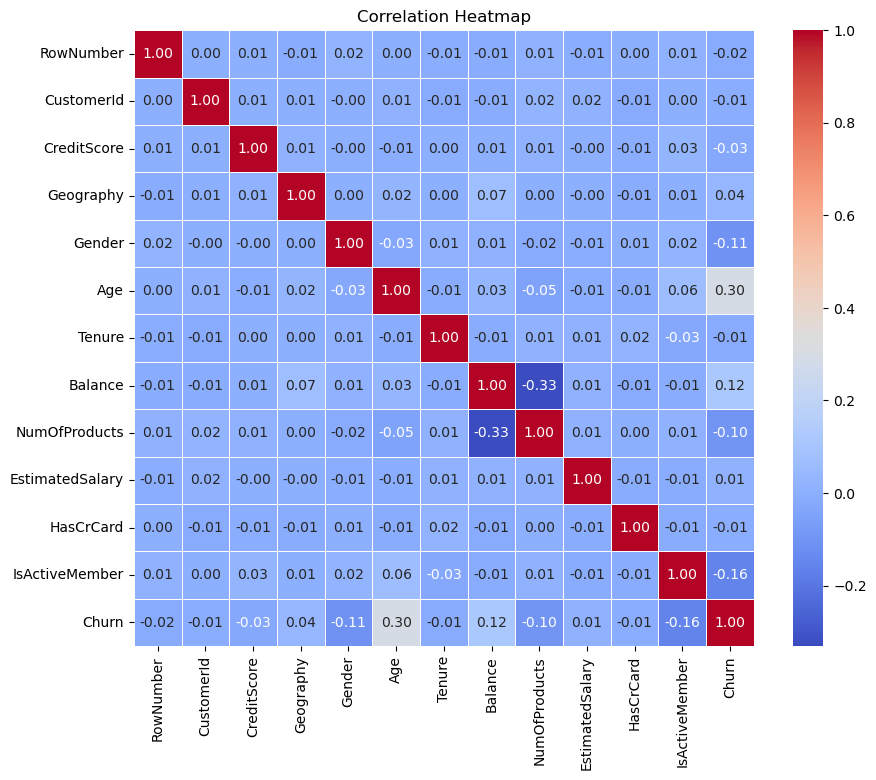

In [46]:
Churn = Churn.select_dtypes(include=['int32', 'int64', 'float64'])
correlation_matrix = Churn.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [47]:
print(Churn['CreditScore'].corr(Churn['Churn']))

-0.026963060065038902


In [48]:
print(Churn['Geography'].corr(Churn['Churn']))

0.03594295460653714


In [49]:
print(Churn['Gender'].corr(Churn['Churn']))

-0.10651248767347475


In [50]:
print(Churn['Age'].corr(Churn['Churn']))

0.29792567730404557


In [51]:
print(Churn['Tenure'].corr(Churn['Churn']))

-0.014001977358758544


In [52]:
print(Churn['Balance'].corr(Churn['Churn']))

0.11853276877163373


In [53]:
print(Churn['NumOfProducts'].corr(Churn['Churn']))

-0.09835921102433463


In [54]:
print(Churn['EstimatedSalary'].corr(Churn['Churn']))

0.01209686102684466


In [55]:
print(Churn['HasCrCard'].corr(Churn['Churn']))

-0.007137765603038914


In [56]:
print(Churn['IsActiveMember'].corr(Churn['Churn']))

-0.1561282781889053


Picking the 5 most important features, we select the features with the highest absolute correlation. 

In [57]:
correlation = Churn.corr()['Churn'].abs().sort_values(ascending=False)

n = 5
top_features = correlation[1:n+1].index.tolist()
print(top_features)

['Age', 'IsActiveMember', 'Balance', 'Gender', 'NumOfProducts']


## Section 5

### Performing feature selection

In [58]:
X = Churn.drop(columns=['Churn'])
y = Churn['Churn']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]

X_test_selected = X_test[selected_features]

print(selected_features)

Index(['Gender', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember'], dtype='object')


<h3 style='color:red'> # Comments </h3>
<h4 style='color:red'> 1) Section 1 (10 marks)  </h4>
<h5 style='color:blue'> 
You have addressed most of the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
<br>a. Analyse data types of features and verify they hold data same as that of their 
datatype. Update if required. Process only appropriate ‘object’ columns 
(having categorical data) to ‘category’ type. <br>
----- You have analysed the data types of all the features. <br>
    ----- Changed object data types to appropriate, try giving informative comments <br>
    b. First, check for Nan values in data and then remove null values for ‘Tenure’ column using mean() applied to it.<br>
----- Nan Values have been handled correctly. <br>
</h5>
<h5 style='color:green'>
<u> Marks scored:  10 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

<h4 style='color:red'> 2) Section 2 (20 marks)  </h4>
<h5 style='color:blue'>       Learner has addressed most of the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
<br>a. Check for duplicates, view duplicated rows, and remove them, if any. <br>    
----- First check for duplicates and then take appropriate action. You directly applied deletion so dont know before and after status of dataset. <br>
<br>b. Check for outliers using boxplot and statistical method, and remove them, if any. <br>    
----- Outliers are identified using boxplots and statistical method (IQR). <br>
<br>c. For categorical features, draw countplot. Write your observations. <br>    ----- Countplot for some of the categorical features has drawn. Also, the observations written. <br>
<br>d. For numeric features, draw a histogram.Compute and about skewness of variables and apply transformation function, if needed. <br>
---- The code correctly draws histograms for many features using Seaborn's displot() function with KDE and  bins.<br>
    ----- Skewness to be corrected.Comments can be more elaborate

<h5 style='color:green'>
<u> Marks scored: 19</u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>
<h4 style='color:red'> 3) Section 3 (20 marks)   </h4>
<h5 style='color:blue'>   Learner has addressed most of the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
<br> a. Come up with joint plot with hue parameter for two pairs of variables. Write your observations from the plot     
<br>---- The provided code creates a joint plot between the variables 'churn' and 'age'. Observations given. Could have used better combination for a better output.<br>
<br> b. Come up with scatter plot with hue parameter for same two pairs of variables. Written how scatter plot and joint plot are different from each other.
<br>
    ----- Done well <br>
    <br>c. Apply any scaling method to for all numeric features.    
<br>---- Scaling done for numeric features.<br>
<br>d. Process non-numeric features to either delete a column or convert them into numeric ones using appropriate encoding techniques.    
<br>----The code successfully achieves the task of converting non-numeric features into numeric ones using the LabelEncoder technique.<br>
----- However, it's important to note that using LabelEncoder might implicitly introduce ordinality in categorical variables, which might not always be appropriate. For non-ordinal categorical variables, techniques like one-hot encoding (pd.get_dummies()) should be considered.
    <br>
    ----- Excellent comments given !!<br>
<h5 style='color:green'>
<u> Marks scored:  19 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>
<h4 style='color:red'> 4) Section 4: (5 marks) </h4>
<h5 style='color:blue'><br>  
<br> Combine results of section 3 (b) and section 3 (c) and then compute correlation among all independent features and demonstrate it using heatmap. Compute correlation of each independent feature with dependent variable ‘Churn’. Select 5 most important independent features from the set. <br>    
<br> ---- The code seems to correctly compute the correlation matrix among independent features and visualize it using a heatmap. <br>
        ----- Five feature  selected using coding.<br>
    ----- Comments to be given.output format can be better<br>

<h5 style='color:green'>                                  
<u> Marks scored: 4 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

<h4 style='color:red'> 5) Section 5: (5 marks) </h4>
<h5 style='color:blue'> <br>   
<br>Consider ‘Churn’ column is prediction variable. The dataset consists of  19,237 samples and we need to use 80% data for training and use it for feature selection. Apply feature selection method to the dataset using SelectKBest() to reduce the dataset size to 5 features.    
    
----- The code seems to achieve the main objective of reducing the dataset size to 5 features for training.<br>
    ----- Comments to be given, output format can be better.<br>

<h5 style='color:green'>
<u> Marks scored: 5 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------

<u> Total Marks scored: 57 </u><br>
    <br>
<b> CONGRATULATIONS!!! <br>
You have successfully completed your capstone project. <br>
You will receive your certificate from the LMS team. </b><br>

-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

Refer to __[https://scikit-learn.org/stable/modules/feature_selection.html](https://scikit-learn.org/stable/modules/feature_selection.html)__  for more details of Feature Selection.